## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

## Notes On Gradient Descent

In [ ]:
#The gradient descent we're computing now is called batch gradient descent
#There is another type of gradient descent called stochastic gradient descent
#Great article here: https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent
#Instead of loop through all the data then computing through the total squarred cost
#Stochastic gradient descent finds the error of each data as it goes along and updates the weights right then
#This is better for large data sets because the batch gradient descent method might take a long time

## Organizing Data

In [3]:
datafile = "ex1data1.txt"
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #Read in comma separated data
#Form the usual "population" matrix and "profit" vector
population = np.transpose(np.array(cols[0:-1,:]))
profit = np.transpose(np.array(cols[-1:,:]))
m = profit.size # number of training examples

# prepend column x with 1s. 
# https://www.coursera.org/learn/machine-learning/lecture/dpF1j/matrix-matrix-multiplication
population = np.insert(population,0,1,axis=1)

## Plotting the Data

Text(0,0.5,'Profit in $10,000s')

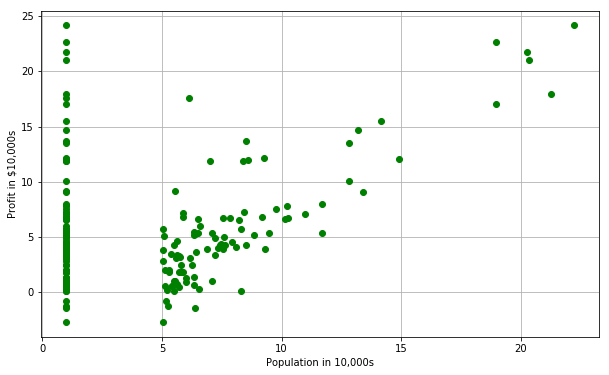

In [4]:
plt.figure(figsize=(10,6))
plt.plot(population, profit, 'go')
plt.grid(True)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')

## Gradient Descent

In [5]:
iterations = 1500
alpha = 0.01

In [6]:
# Linear Hypothesis Function
def hypothesis_function(theta, X):
    return np.dot(X, theta)

In [ ]:
Image("Cost_function1.png", width=500, height=100)
# Linear regression cost function is the sum of squarred errors

In [7]:
# Cost Function
def cost_function(theta, X, y):
    return float((1/(2*m))*np.dot((hypothesis_function(theta, X)-y).T,(hypothesis_function(theta, X)-y)))

In [8]:
#(theta is a vector with n rows and 1 columns (if X has n features)
# for shape[], 0 refers to rows and 1 refers to columns
# for np.zeros logic a bit different
# np.zero documentation: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.zeros.html


# initial_theta.shape = (2,1) | np.zeros((population.shape[1],1)).shape = (2,1)
# population.shape = (97,2)
# (hypothesis_function(initial_theta,X) - y).shape = (97, 1)
# (np.array(population[:,j]).reshape(m,1)).shape(97,1)

In [9]:
# Gradient Descesent
def gradient_descent(X, theta_start):
    theta = theta_start
    jvec = [] # plot cost as a function of iteration
    for i in range(iterations):
        tmptheta = theta
        jvec.append(cost_function(theta,population,profit))
        # Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((hypothesis_function(initial_theta,population)-profit)*np.array(population[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, jvec

In [10]:
# Running the gradient descent to get results
initial_theta = np.zeros((population.shape[1],1))
theta, jvec = gradient_descent(population, initial_theta)

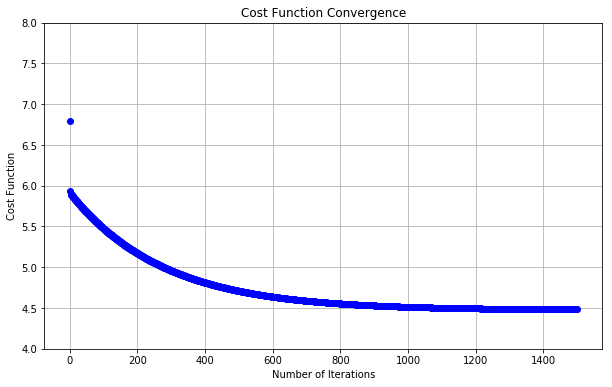

In [11]:
# Plot convergence
def plot_convergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Cost Function Convergence")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Function")
    plt.ylim((4,8))
    
plot_convergence(jvec)

Text(0,0.5,'Profit in $10,000s')

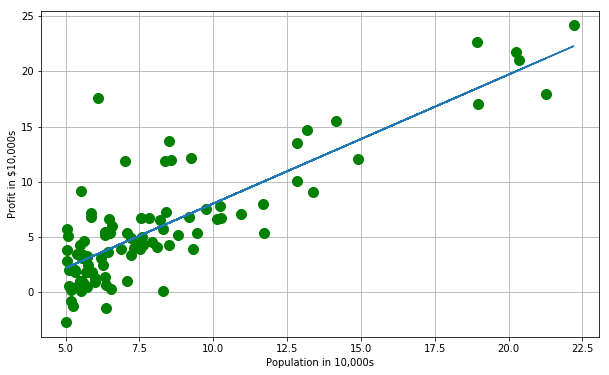

In [12]:
# Plot line on top of the data to sense check
def best_fit(x_value):
    return theta[0] + theta[1]*x_value

plt.figure(figsize=(10,6))
plt.plot(population[:,1],profit[:,0],'go',markersize=10,)
plt.plot(population[:,1],best_fit(population[:,1]))
plt.grid(True)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')